In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Year 4/NLP notebooks and data/Data/Preprocessed/with_topics_numeric.csv')

# FastText + HDBSCAN

In [ ]:
import numpy as np

In [ ]:
from scipy.sparse import load_npz

In [ ]:
df_labels = pd.read_csv('/content/drive/MyDrive/Year 4/NLP notebooks and data/Data/Preprocessed/with_topics_numeric.csv', index_col = 0)

In [ ]:
df_labels.columns

Index(['id', 'address', 'city', 'placeName', 'numberOfReviews', 'placeRating',
       'webUrl', 'publishedDate', 'userRating', 'roomTip', 'review_text',
       'review_title', 'travelDate', 'tripType', 'username', 'word_tokens',
       'bpe_tokens', 'bigram_tokens', 'trigram_tokens', 'whitespace_tokens',
       'rule_based_tokens', 'spacy_tokens', 'wordpiece_tokens', 'vader_score',
       'compound_score', 'vader_category', 'flair_sentiment',
       'flair_confidence', 'textblob_sentiment', 'ground_truth',
       'assigned_topics'],
      dtype='object')

In [ ]:
df = df_labels.loc[:,['placeRating','review_text','ground_truth','assigned_topics']]

In [ ]:
# Load the NumPy array from the .npy file
drive_path = "/content/drive/MyDrive/Year 4/NLP notebooks and data/dense_vectors"
vec_type = 'word2vec'#'fasttext' #'word2vec' #
loaded_vectors = np.load(drive_path+f'/{vec_type}_vectors.npy')

In [ ]:
# ! pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 53.1 MB/s eta 0:00:00


In [ ]:
# HDBSCAN is a density-based clustering method that does not require the number of clusters in advance.
import hdbscan

# Fit HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10,
                                    min_samples = 5,
                                    metric='euclidean',
                                    cluster_selection_epsilon=0.1 )
topics = hdbscan_clusterer.fit_predict(loaded_vectors)

# Number of clusters (excluding noise points labeled as -1)
n_clusters = len(set(topics)) - (1 if -1 in topics else 0)
print(f"Number of clusters: {n_clusters}")

Number of clusters: 0


In [ ]:
# Since the number of clusters are very low

In [ ]:
from sklearn.preprocessing import normalize

X_fasttext = normalize(loaded_vectors)

In [ ]:
hdbscan_clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,  # Experiment with values like 5, 10, 20
    min_samples=5,        # Lower this for higher sensitivity to small clusters
    metric='euclidean',   # Other options: 'cosine', 'manhattan'
    cluster_selection_epsilon=0.1  # Add if clusters are too sparse
)
topics_nomralized = hdbscan_clusterer.fit_predict(X_fasttext)


In [ ]:
# Number of clusters (excluding noise points labeled as -1)
n_clusters = len(set(topics_nomralized)) - (1 if -1 in topics_nomralized else 0)
print(f"Number of clusters: {n_clusters}")

Number of clusters: 4


In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 50 before HDBSCAN
pca = PCA(n_components=50, random_state=42)
X_reduced = pca.fit_transform(X_fasttext)

# Run HDBSCAN on reduced data
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean')
topics = hdbscan_clusterer.fit_predict(X_reduced)


In [ ]:
# Number of clusters (excluding noise points labeled as -1)
n_clusters = len(set(topics)) - (1 if -1 in topics else 0)
print(f"Number of clusters: {n_clusters}")

Number of clusters: 2


In [ ]:
print(set(topics))


{0, 1, -1}


# Visualization

In [ ]:
X_embedded.shape

(11808, 3)

## PCA

In [ ]:
import random

In [ ]:
from sklearn.decomposition import PCA

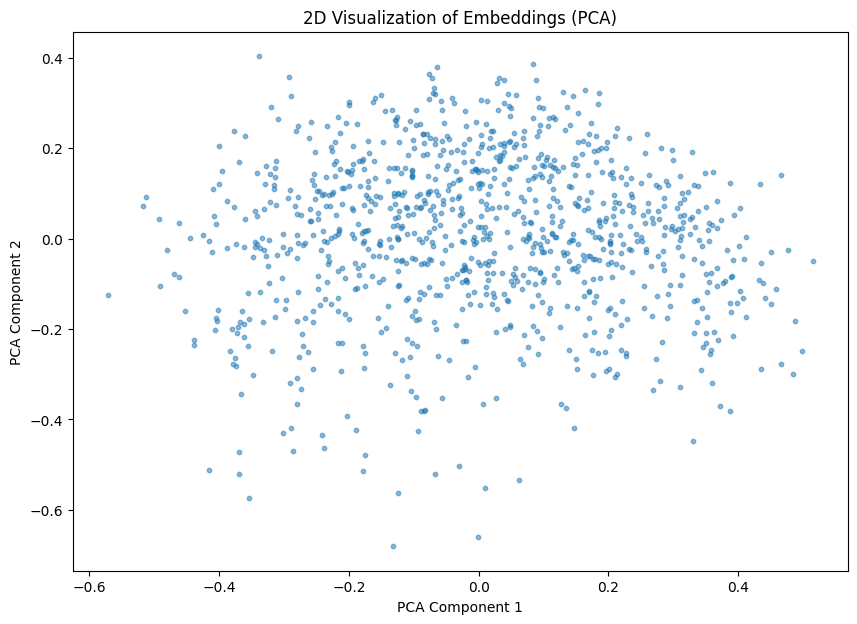

In [ ]:
random_vectors = random.sample(range(11808), 1000)

# Reduce embeddings to 2D
pca = PCA(n_components=20)
X_embedded = pca.fit_transform(X_fasttext)

# Plot the reduced embeddings
plt.figure(figsize=(10, 7))
plt.scatter(X_embedded[random_vectors, 0], X_embedded[random_vectors, 1], alpha=0.5, s=10)
plt.title("2D Visualization of Embeddings (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [ ]:
fasttext_vectors = X_fasttext
sentiments = df['ground_truth']

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(fasttext_vectors)

# Map sentiments to colors
sentiment_colors = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}
colors = [sentiment_colors[s] for s in sentiments]

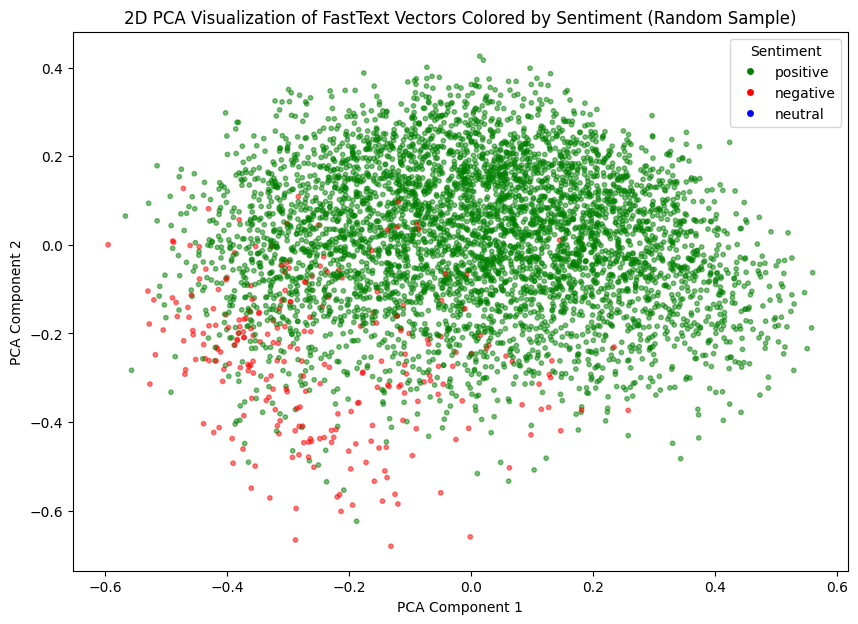

In [ ]:
# Generate random indices
random.seed(42)  # Set a seed for reproducibility
random_vectors = random.sample(range(X_pca.shape[0]), 5000)  # Randomly sample 100 indices

# Subset PCA components and corresponding colors using the random indices
X_pca_subset = X_pca[random_vectors]
colors_subset = [colors[i] for i in random_vectors]

# Create scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X_pca_subset[:, 0], X_pca_subset[:, 1], c=colors_subset, alpha=0.5, s=10)
plt.title("2D PCA Visualization of FastText Vectors Colored by Sentiment (Random Sample)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=k, markerfacecolor=v)
                     for k, v in sentiment_colors.items()],
           title="Sentiment")
plt.show()


## TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# Fit t-SNE to the embeddings
tsne = TSNE(n_components=3, perplexity=80, random_state=42)
X_tsne = tsne.fit_transform(X_fasttext)

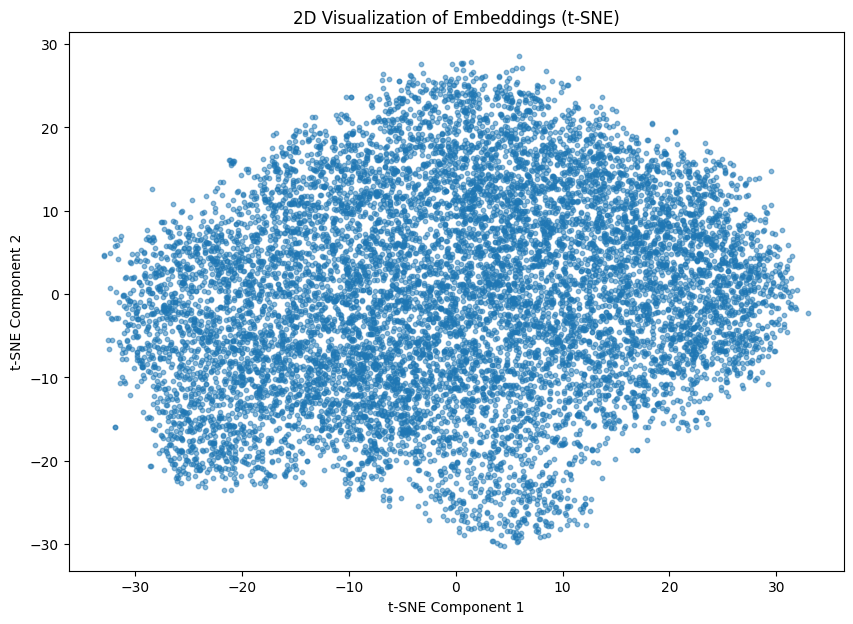

In [ ]:
# Plot the t-SNE projection
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, s=10)
plt.title("2D Visualization of Embeddings (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

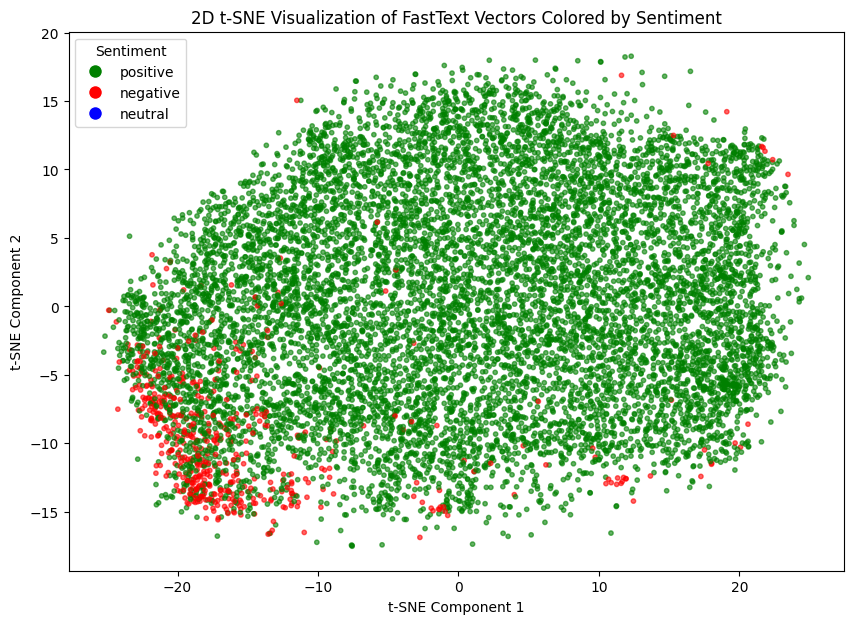

In [ ]:
# Define sentiment colors
sentiment_colors = {
    "positive": "green",
    "negative": "red",
    "neutral": "blue"
}

# Map sentiment labels to colors
colors = [sentiment_colors[sent] for sent in sentiments]

# Randomly sample 1000 points for visualization
random_indices = random.sample(range(X_tsne.shape[0]), min(10000, X_tsne.shape[0]))

# Create scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[random_indices, 0], X_tsne[random_indices, 1],
            c=np.array(colors)[random_indices], alpha=0.6, s=15)
plt.title("2D t-SNE Visualization of FastText Vectors Colored by Sentiment")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

# Add legend
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=k, markerfacecolor=v, markersize=10)
                     for k, v in sentiment_colors.items()],
           title="Sentiment", loc="best")
plt.show()


In [ ]:
# Define topic colors (example: topics 0 to 9)
num_topics = df['assigned_topics'].nunique()  # Get the number of unique topics
topic_colors = {topic: plt.cm.tab10(topic % 10) for topic in range(num_topics)}  # Use tab10 colormap
# Map topics to colors
colors = [topic_colors[topic] for topic in df['assigned_topics']]

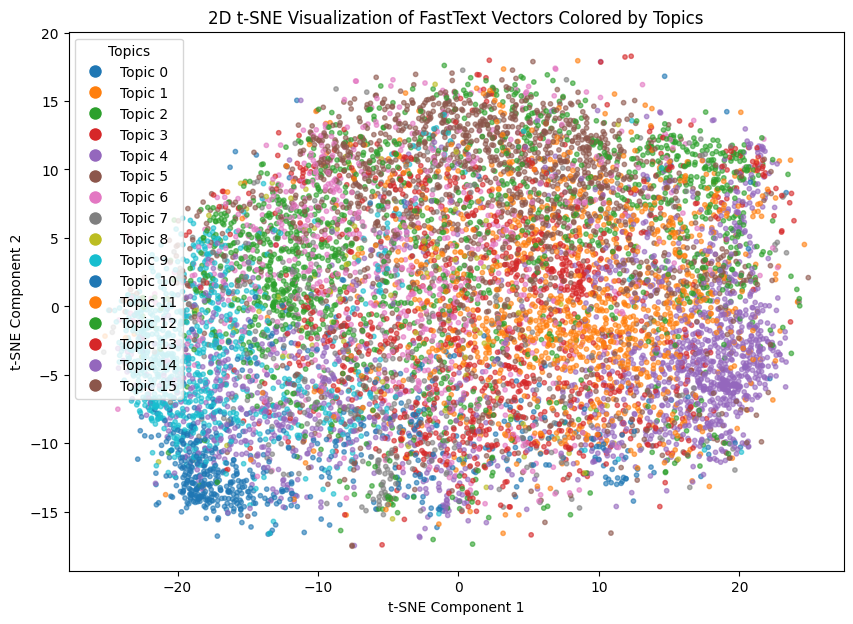

In [ ]:
# Randomly sample points for visualization (e.g., 1000 points)
random_indices = random.sample(range(X_tsne.shape[0]), min(10000, X_tsne.shape[0]))

# Create scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[random_indices, 0], X_tsne[random_indices, 1],
            c=np.array(colors)[random_indices], alpha=0.6, s=5)
plt.title("2D t-SNE Visualization of FastText Vectors Colored by Topics")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

# Add legend for topics
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f"Topic {k}", markerfacecolor=v, markersize=10)
                     for k, v in topic_colors.items()],
           title="Topics", loc="best")
plt.show()
